In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [3]:
df.shape

(150, 4)

In [4]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df = df.drop_duplicates()

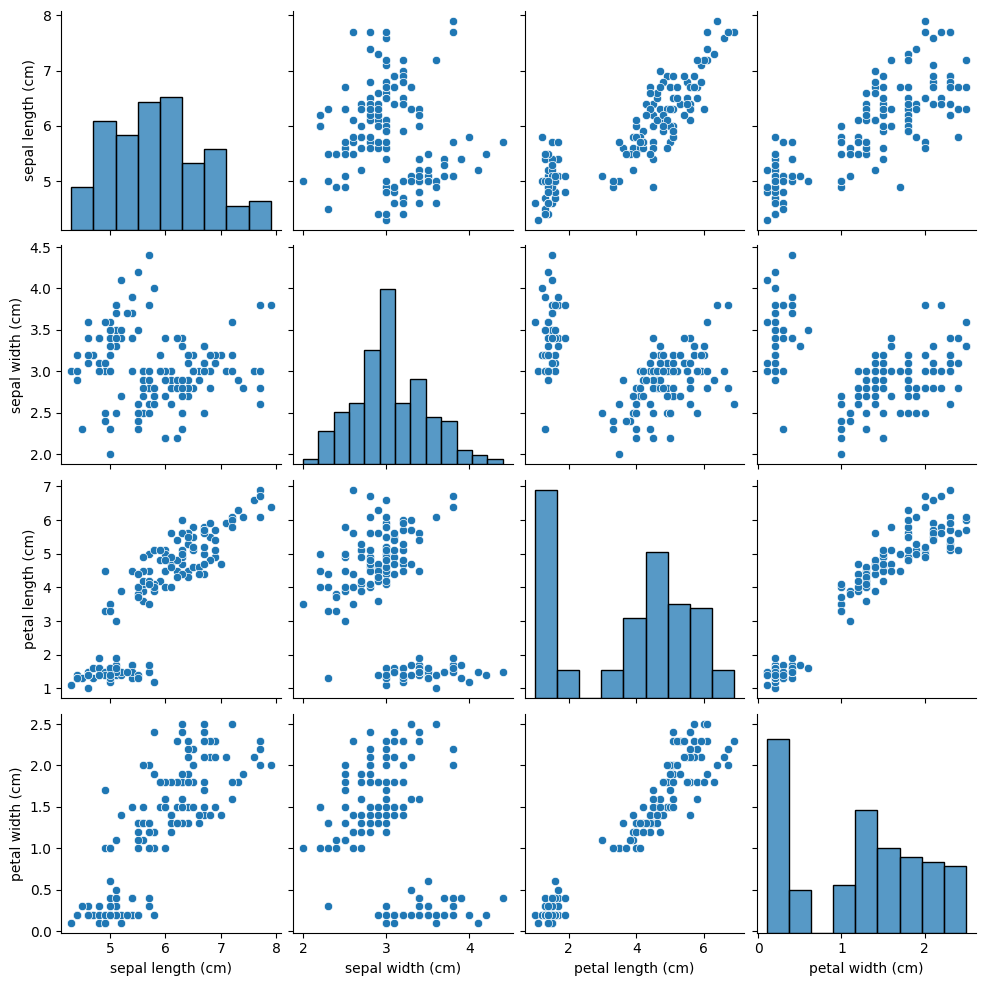

In [7]:
sns.pairplot(df)

In [8]:
df.duplicated().sum()

np.int64(0)

In [ ]:
X_train,X_test = train_test_split(df,test_size=0.1,random_state=42)

# K-Means Clustering Algorithm

### 1. Generate Random Centroids

- Start by selecting `k` initial centroids randomly from the dataset.

### 2. Initialize K-Means with Random Centroids
- Choose a value for `k` (the number of clusters).
- Initialize centroids randomly from the dataset.

### 3. For a Given Number of Iterations:

#### 3.1. Iterate Through the Data Points:

- For each item in the dataset:

    - **Find the Closest Centroid (Mean)**:
        - Calculate the Euclidean distance of the item from each centroid (mean).
        - Assign the item to the centroid that is closest (i.e., the one with the minimum distance).

#### 3.2. Update the Centroids:

- After assigning all the items to the closest centroids, calculate the new mean (centroid) for each cluster.
- The new centroid is the average of all the items in that cluster.

### 4. Repeat Until Convergence:

- Repeat the process of assigning clusters and updating centroids for a fixed number of iterations or until the centroids stabilize (i.e., they no longer change).

This process helps the algorithm group the dataset into `k` clusters, with each data point assigned to its closest centroid.


In [11]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [16]:
def define_centroids(X, k):
    X = np.array(X)
    n_samples, n_features = X.shape
    centroids = np.zeros((k, n_features))
    for i in range(k):
        centroid = X[np.random.choice(range(n_samples))]
        centroids[i] = centroid
    return centroids

initial_centroids = define_centroids(X_train, 3)
print("Initial centroids:\n", initial_centroids)

Initial centroids:
 [[6.6 2.9 4.6 1.3]
 [5.4 3.9 1.3 0.4]
 [6.2 2.8 4.8 1.8]]


In [23]:
def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

def update_centroids(X, clusters, k):
    n_features = X.shape[1]
    new_centroids = np.zeros((k, n_features))
    for i in range(k):
        points_in_cluster = X[np.array(clusters) == i]
        if len(points_in_cluster) > 0:
            new_centroids[i] = points_in_cluster.mean(axis=0)
    return new_centroids

clusters = assign_clusters(X_train, initial_centroids)
updated_centroids = update_centroids(X_train, clusters, 3)
print("Updated centroids:\n", updated_centroids)

Updated centroids:
 [[6.26956522 2.82608696 4.35652174 1.30434783]
 [4.975      3.42727273 1.45909091 0.24772727]
 [6.24029851 2.8761194  5.0880597  1.79850746]]


In [ ]:
def predict(X, centroids):
    X = np.array(X)
    predictions = []
    for x in X:
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        predictions.append(cluster)
    return predictions

predictions = predict(X_test, updated_centroids)
print("\nPredicted cluster indices for new data points:\n", predictions)


Predicted cluster indices for new data points:
 [np.int64(0), np.int64(1), np.int64(2), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(2), np.int64(0), np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
